In [15]:
from google.colab import drive
drive.mount('/drive')

import os
os.chdir('/drive/My Drive/DOTE6635')
print("当前工作目录:", os.getcwd())


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
当前工作目录: /drive/My Drive/DOTE6635


In [16]:
import pandas as pd

# Specify the encoding when reading the CSV file
catagory = pd.read_csv('catagory.csv', encoding='gbk')  # Try 'gbk' or 'latin-1' if 'gbk' doesn't work

# Get the number of rows and columns.
num_rows = catagory.shape[0]
num_cols = catagory.shape[1]

print(f"The 'catagory' DataFrame has {num_rows} rows and {num_cols} columns.")

# Get data types of each column.
print("\nData types of each column:")
print(catagory.dtypes)

# Display the first few rows of the DataFrame.
print("\nFirst few rows of the DataFrame:")
print(catagory.head())

The 'catagory' DataFrame has 40 rows and 3 columns.

Data types of each column:
Category     object
Product      object
Price($)    float64
dtype: object

First few rows of the DataFrame:
                   Category  \
0                FruitJuice   
1               FruitDrinks   
2  BabyMilkandMilkFlavoring   
3                      Soup   
4           CatFood-WetType   

                                             Product  Price($)  
0  Capri Sun Variety Pack with Fruit Punch, Straw...      9.43  
1  Kool Aid Jammers Variety Pack with Tropical Pu...      7.27  
2  Horizon Organic Shelf-Stable Whole Milk Boxes,...     13.98  
3  Maruchan Ramen Noodle Chicken Flavor Soup, 3 O...      9.97  
4  Purina Fancy Feast Chicken Feast Classic Grain...      0.88  


In [17]:
# prompt: 对于每一个catagory以及对应的product，以及价格，生成一系列vary price 这个价格为对应价格vary the price from
# #  0 to 200% of the regular price, in 20% increments. This gives us 11 price points to test for each product
# #  ({0, 20%,..100%,..200%} of the regular price，所以，我们一共要生成11列vary price 分别对应0%到200% 最后每一个数组记录catagory，product，常规价格（即未变动前的价格）以及vary price， 列名分别为为vary price（20%），vary price（40%）以此类推，最后让我看一眼数据

from google.colab import drive
import os
import pandas as pd
import random

drive.mount('/drive')
os.chdir('/drive/My Drive/DOTE6635')
print("Current working directory:", os.getcwd())

try:
    catagory = pd.read_csv('catagory.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        catagory = pd.read_csv('catagory.csv', encoding='latin-1')
    except UnicodeDecodeError:
        catagory = pd.read_csv('catagory.csv', encoding='gbk')

data = []
for index, row in catagory.iterrows():
    category = row['Category']
    product = row['Product']
    original_price = row['Price($)']

    # Create varied prices
    varied_prices = [original_price * (i * 0.2) for i in range(11)]

    data.append([category, product, original_price] + varied_prices)

# Create column names
columns = ['Category', 'Product', 'Original Price']
for i in range(11):
    columns.append(f'Vary Price ({i*20}%)')

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
Current working directory: /drive/My Drive/DOTE6635


,Category,Product,Original Price,Vary Price (0%),Vary Price (20%),Vary Price (40%),Vary Price (60%),Vary Price (80%),Vary Price (100%),Vary Price (120%),Vary Price (140%),Vary Price (160%),Vary Price (180%),Vary Price (200%)
0,FruitJuice,"Capri Sun Variety Pack with Fruit Punch, Straw...",9.43,0.0,1.886,3.772,5.658,7.544,9.43,11.316,13.202,15.088,16.974,18.86
1,FruitDrinks,Kool Aid Jammers Variety Pack with Tropical Pu...,7.27,0.0,1.454,2.908,4.362,5.816,7.27,8.724,10.178,11.632,13.086,14.54
2,BabyMilkandMilkFlavoring,"Horizon Organic Shelf-Stable Whole Milk Boxes,...",13.98,0.0,2.796,5.592,8.388,11.184,13.98,16.776,19.572,22.368,25.164,27.96
3,Soup,"Maruchan Ramen Noodle Chicken Flavor Soup, 3 O...",9.97,0.0,1.994,3.988,5.982,7.976,9.97,11.964,13.958,15.952,17.946,19.94
4,CatFood-WetType,Purina Fancy Feast Chicken Feast Classic Grain...,0.88,0.0,0.176,0.352,0.528,0.704,0.88,1.056,1.232,1.408,1.584,1.76
5,PetSupplies-DogFood,"Purina Dog Chow Complete, Dry Dog Food for Adu...",29.17,0.0,5.834,11.668,17.502,23.336,29.17,35.004,40.838,46.672,52.506,58.34
6,Snacks-PotatoChips,"Lay¡¯s Classic Potato Snack Chips, Party Size,...",5.44,0.0,1.088,2.176,3.264,4.352,5.44,6.528,7.616,8.704,9.792,10.88
7,Snacks-TortillaChips,"Doritos Nacho Cheese Tortilla Snack Chips, Par...",5.94,0.0,1.188,2.376,3.564,4.752,5.94,7.128,8.316,9.504,10.692,11.88
8,Cereal-ReadytoEat,"Cinnamon Toast Crunch Breakfast Cereal, Crispy...",4.93,0.0,0.986,1.972,2.958,3.944,4.93,5.916,6.902,7.888,8.874,9.86
9,Cookies,"Little Debbie Oatmeal Creme Pies, 12 ct, 16.2 oz",2.68,0.0,0.536,1.072,1.608,2.144,2.68,3.216,3.752,4.288,4.824,5.36


In [18]:
# prompt: 阅读路径下名为newresponses1.csv的文件,告诉我她的行列数,对于每一行，如果既有文字又有数字，则仅保留数字，最后给我展示

import pandas as pd
import re

# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/drive')

# Change working directory
import os
os.chdir('/drive/My Drive/DOTE6635')

def process_dataframe(filepath):
    try:
        # Attempt to read the file with different encodings
        df = pd.read_csv(filepath, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(filepath, encoding='latin-1')
        except UnicodeDecodeError:
            df = pd.read_csv(filepath, encoding='gbk')

    num_rows, num_cols = df.shape
    print(f"The DataFrame has {num_rows} rows and {num_cols} columns.")

    processed_data = []

    for index, row in df.iterrows():
        new_row = []
        for item in row:
            if pd.isna(item):  # Handle NaN values gracefully
                new_row.append(item)
                continue

            if isinstance(item, str):
                numbers = re.findall(r"[-+]?\d*\.?\d+|[-+]?\d+", item)
                if numbers:
                    new_row.append(numbers[0]) #Take only the first number found
                else:
                    new_row.append(item)
            else:
                new_row.append(item)
        processed_data.append(new_row)

    processed_df = pd.DataFrame(processed_data, columns=df.columns)
    return processed_df

# Process the CSV file
filepath = 'newresponses1.csv' #Make sure the file name is correct
processed_df = process_dataframe(filepath)

# Display the modified DataFrame
processed_df


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: 'newresponses1.csv'

In [ ]:
# prompt: 将这processed_df一列数据，每三十行进行一次平均，比如说第1到第30平均作为新变量的第一个数据，第31到第60作为第二个，最后生成一个新的220行1列的数据

import pandas as pd
import numpy as np

# Assuming 'processed_df' is already defined from the previous code

# Select the column you want to process (replace 'YourColumnName' with the actual column name)
column_to_process = processed_df.iloc[:, 0] # Example: process the first column

# Check if the column contains numeric data. If not, convert or handle accordingly.
if not pd.api.types.is_numeric_dtype(column_to_process):
    try:
        column_to_process = pd.to_numeric(column_to_process, errors='coerce') # Convert to numeric, handling errors
    except ValueError:
        print("Column cannot be converted to numeric. Please ensure the data is numeric.")
        # Handle non-numeric data appropriately, possibly by skipping the averaging
        # or by using another method for non-numeric columns
        exit()
    column_to_process = column_to_process.fillna(0) # Handle NaN values


# Calculate the averages in groups of 30
averages = []
for i in range(0, len(column_to_process), 30):
  chunk = column_to_process[i:i+30]
  # Handle potential empty chunks
  if not chunk.empty:
      average = np.mean(chunk)
      averages.append(average)
  else:
      averages.append(np.nan) # Or another suitable value for empty chunks

# Create a new DataFrame with the averages
new_df = pd.DataFrame({'Average': averages})

new_df


,Average
0,8.793000
1,2.818000
2,3.761667
3,6.338933
4,7.540000
...,...
215,7.348667
216,8.614000
217,9.842333
218,11.057000


In [ ]:
# prompt: 现在，我需要将刚刚得到的new_df增加一些信息要利用刚刚建立的df数组，首先新增一列vary price。第1行对应varyprice为0%，第二行为20%。第三行为40%以此类推，第11行为200%，第12行对应daryprice为0%，以此类推。之后，增加一列regular price，第1到11行全部对应 df数组Original Price的第一行（这意味着这11行的值是相同的），第12到21行全部对应 df数组regular price的第2行 以此类推，

# Assuming 'df' and 'new_df' are already defined from the previous code

import pandas as pd
import numpy as np

# Create 'Vary Price' column
vary_prices = []
for i in range(len(new_df)):
    vary_prices.append(str(int((i % 11) * 20)) + '%')  # Calculate percentage and convert to string

new_df['Vary Price'] = vary_prices

# Create 'Regular Price' column
regular_prices = []
for i in range(len(new_df)):
    original_price_index = i // 11  # Calculate the index in the 'Original Price' column of 'df'
    if original_price_index < len(df['Original Price']):
        regular_prices.append(df['Original Price'][original_price_index])
    else:
        regular_prices.append(np.nan) # Handle cases where original_price_index is out of bounds

new_df['Regular Price'] = regular_prices

# Display the updated DataFrame
new_df


,Average,Vary Price,Regular Price
0,8.793000,0%,9.43
1,2.818000,20%,9.43
2,3.761667,40%,9.43
3,6.338933,60%,9.43
4,7.540000,80%,9.43
...,...,...,...
215,7.348667,120%,6.17
216,8.614000,140%,6.17
217,9.842333,160%,6.17
218,11.057000,180%,6.17


In [ ]:
# prompt: 生成一个新的变量叫做 last price， 为Average除以Regular price

# Calculate 'Last Price'
new_df['Last Price'] = new_df['Average'] / new_df['Regular Price']

# Display the updated DataFrame
new_df


,Average,Vary Price,Regular Price,Last Price
0,8.793000,0%,9.43,0.932450
1,2.818000,20%,9.43,0.298834
2,3.761667,40%,9.43,0.398904
3,6.338933,60%,9.43,0.672209
4,7.540000,80%,9.43,0.799576
...,...,...,...,...
215,7.348667,120%,6.17,1.191032
216,8.614000,140%,6.17,1.396110
217,9.842333,160%,6.17,1.595192
218,11.057000,180%,6.17,1.792058


In [ ]:
# prompt: 删除 Average和regular price两列

# Drop 'Average' and 'Regular Price' columns
new_df = new_df.drop(['Average', 'Regular Price'], axis=1)

# Display the updated DataFrame
new_df


,Vary Price,Last Price
0,0%,0.932450
1,20%,0.298834
2,40%,0.398904
3,60%,0.672209
4,80%,0.799576
...,...,...
215,120%,1.191032
216,140%,1.396110
217,160%,1.595192
218,180%,1.792058


In [ ]:
# prompt: 对于现在的new_df变量，第1，12，23，34，45行一直到第210行进行平均，第2，13，24，35，46行一直到第211行进行平均，以此类推，第11，22，33，44，55行一直到第220行进行平均，最终得到一个11行2列的数据

# Assuming 'new_df' is already defined from the previous code

result_data = []
for i in range(11):
    start_row = i
    rows_to_average = []
    for j in range(20):
        row_index = start_row + j * 11
        if row_index < len(new_df):
            rows_to_average.append(new_df['Last Price'][row_index])

    avg_last_price = np.mean(rows_to_average) if rows_to_average else np.nan
    result_data.append([new_df['Vary Price'][i], avg_last_price])

result_df = pd.DataFrame(result_data, columns=['Vary Price', 'Average Last Price'])
result_df


,Vary Price,Average Last Price
0,0%,2.044489
1,20%,1.225512
2,40%,1.118050
3,60%,1.302416
4,80%,1.302883
5,100%,1.084179
6,120%,1.390455
7,140%,1.515147
8,160%,1.605775
9,180%,1.764602


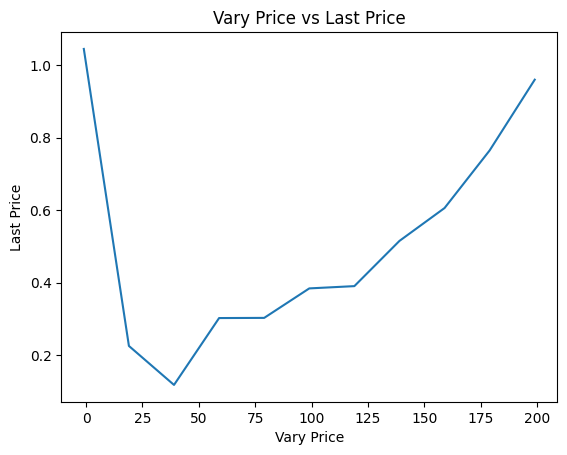

In [ ]:
# prompt: 画一个折线图，横轴为Vary price减去1，命名为Vary price，纵轴为Last price减去1，命名为Last price

import matplotlib.pyplot as plt

# Assuming 'result_df' is already defined from the previous code

# Prepare data for the plot
vary_prices = result_df['Vary Price'].astype(str).str.replace('%', '').astype(int) # Extract numbers from string
last_prices = result_df['Average Last Price']

# Create the line plot
plt.plot(vary_prices - 1, last_prices -1)

# Set plot labels and title
plt.xlabel('Vary Price')
plt.ylabel('Last Price')
plt.title('Vary Price vs Last Price')

# Display the plot
plt.show()
